# Imports

In [22]:
import pm4py
import pandas as pd
from Julia import tree_to_tptp
from example_usage import use_provers
from create_thesis_with_2_spec import create_thesis_with_2_spec, LogicFunctions
import os

In [23]:
def print_provers(provers):
    print(provers[0])
    print(f'Vampire: {provers[1]}')
    print(f'Eprover: {provers[2]}')

def provers_to_csv(provers):
    print(','.join(provers))

# Julia's problems

## Problem1

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2582.43it/s]

Seq3(1]register_request, Loop(2]l_s, Seq2(3]And2(4]a2_s, check_ticket, Xor2(5]x2_s, examine_casually, examine_thoroughly, x2_e[5), a2_e[4), decide[3), reinitiate_request[2), Xor2(2]x2_s, pay_compensation, reject_request, x2_e[2)[1)
ini: register_request
fin: x2_e

Wynik: 
ForAll(~((pay_compensation) ^ (reject_request)))
ForAll((a2_s | decide) => ((Exist(reinitiate_request) ^ Exist(a2_s | decide)) | (~(Exist(reinitiate_request)))))
ForAll(~((a2_s) ^ ((check_ticket) | (x2_s | x2_e))))
ForAll(~((x2_s) ^ (reject_request)))
ForAll(~((x2_s) ^ (pay_compensation)))
ForAll(((examine_casually) | (examine_thoroughly)) => Exist(x2_e))
ForAll((a2_s | a2_e) => Exist(decide))
ForAll(~((register_request) ^ (x2_s | x2_e)))
ForAll((check_ticket) => Exist(a2_e))
ForAll(~((l_s) ^ (reinitiate_request)))
ForAll((x2_s) => ((Exist(pay_compensation) ^ ~(Exist(reject_request))) | (~(Exist(pay_compensation)) ^ Exist(reject_request))))
ForAll(~((x2_s) ^ (examine_casually)))
ForAll(~((examine_thoroughly) ^ (x2_e))


/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/d

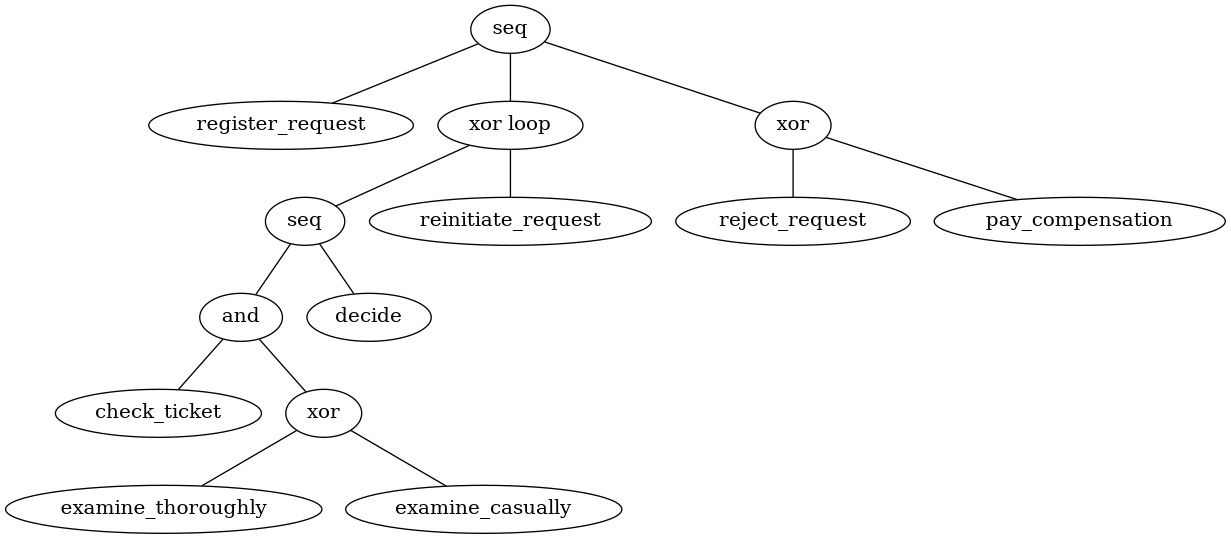





our_problems/problem_1.p
Vampire: % SZS status Satisfiable for problem_1 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status Satisfiable


In [24]:
log = pm4py.read_xes("Data/running-example.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_1.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print("\n\n\n")
print_provers(use_provers("our_problems/problem_1.p"))

## Problem2

/tmp/ipykernel_389947/275650840.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','), case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_d

Seq5(1]Register, Analyze_Defect, And2(2]a2_s, Xor2(3]x2_s, tau, Inform_User, x2_e[3), And2(3]a2_s, Xor2(4]x2_s, tau, Loop(5]l_s, Repair_Complex, tau[5), x2_e[4), Xor2(4]x2_s, tau, Loop(5]l_s, Seq2(6]Xor2(7]x2_s, tau, Repair_Simple, x2_e[7), Test_Repair[6), Restart_Repair[5), x2_e[4), a2_e[3), a2_e[2), Xor2(2]x2_s, tau, Archive_Repair, x2_e[2), End[1)
ini: Register
fin: End

Wynik: 
ForAll(((tau) | (Repair_Simple)) => Exist(x2_e))
ForAll(~((tau) ^ (Repair_Simple)))
ForAll(~((tau) ^ (l_s | Repair_Complex)))
ForAll(~((tau) ^ (Archive_Repair)))
ForAll(~((Repair_Complex) ^ (tau)))
ForAll(~((x2_s) ^ (l_s | Test_Repair)))
ForAll(~((tau) ^ (Inform_User)))
ForAll((x2_s | x2_e) => Exist(End))
ForAll(~((Register) ^ (Analyze_Defect)))
ForAll(~((Register) ^ (a2_s | a2_e)))
ForAll(~((Register) ^ (End)))
ForAll(~((a2_s | a2_e) ^ (End)))
ForAll(~((x2_s | Test_Repair) ^ (Restart_Repair)))
ForAll(~((a2_s | a2_e) ^ (x2_s | x2_e)))
ForAll((x2_s) => ((Exist(tau) ^ ~(Exist(l_s | Repair_Complex))) | (~(Exist

/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[co

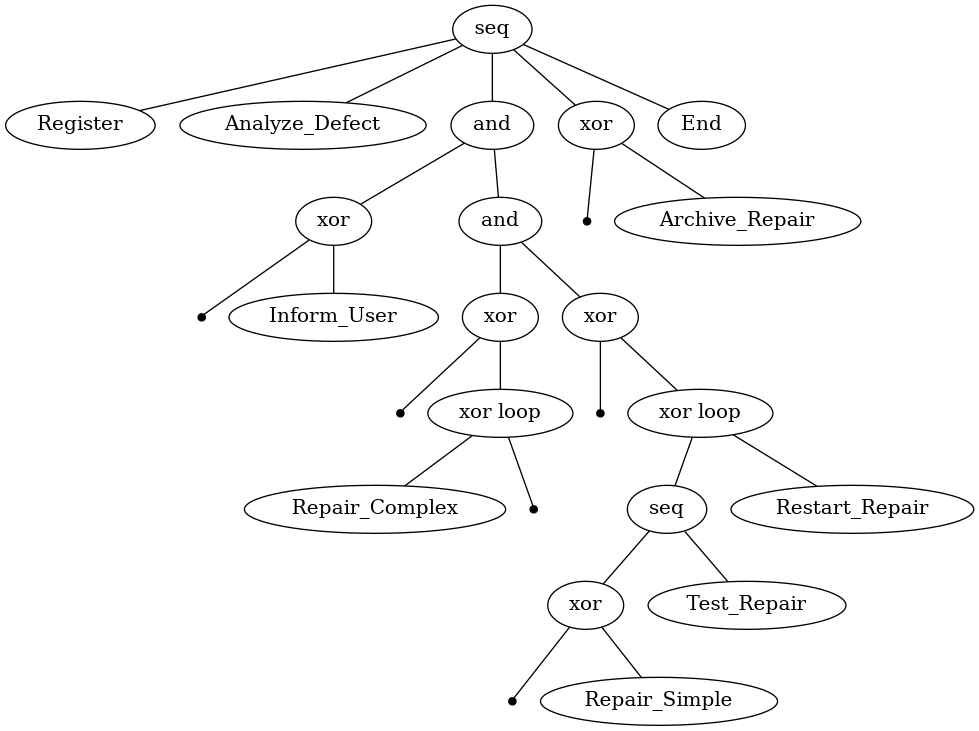





our_problems/problem_2.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for problem_2
Eprover: # Proof found! # SZS status Unsatisfiable


In [25]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','), case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_2.p", rule_prefix="B")
pm4py.view_process_tree(process_tree)
print("\n\n\n")
print_provers(use_provers("our_problems/problem_2.p"))

## Problem3

/tmp/ipykernel_389947/743655084.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/sit

Seq5(1]Register, Analyze_Defect, And2(2]a2_s, Xor2(3]x2_s, tau, Inform_User, x2_e[3), Seq2(3]Loop(4]l_s, Xor2(5]x2_s, Repair_Simple, Repair_Complex, x2_e[5), Restart_Repair[4), Test_Repair[3), a2_e[2), Archive_Repair, End[1)
ini: Register
fin: End

Wynik: 
ForAll(~((a2_s | a2_e) ^ (Archive_Repair)))
ForAll(~((x2_s) ^ (Repair_Complex)))
ForAll(~((x2_s | x2_e) ^ (Restart_Repair)))
ForAll(~((a2_s | a2_e) ^ (End)))
ForAll(~((tau) ^ (Inform_User)))
ForAll(~((Register) ^ (End)))
ForAll((l_s) => Exist(x2_s | x2_e))
ForAll((x2_s | x2_e) => ((Exist(Restart_Repair) ^ Exist(x2_s | x2_e)) | (~(Exist(Restart_Repair)))))
ForAll(~((Register) ^ (Analyze_Defect)))
ForAll(~((Register) ^ (a2_s | a2_e)))
ForAll(~((Analyze_Defect) ^ (Archive_Repair)))
ForAll((Restart_Repair) => Exist(x2_s | x2_e))
ForAll((Analyze_Defect) => Exist(a2_s | a2_e))
ForAll(~((tau) ^ (x2_e)))
Exist(x2_s)
ForAll(~((x2_s) ^ (tau)))
ForAll((a2_s | a2_e) => Exist(Archive_Repair))
ForAll(~((Analyze_Defect) ^ (a2_s | a2_e)))
Exist(Regi

/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[co

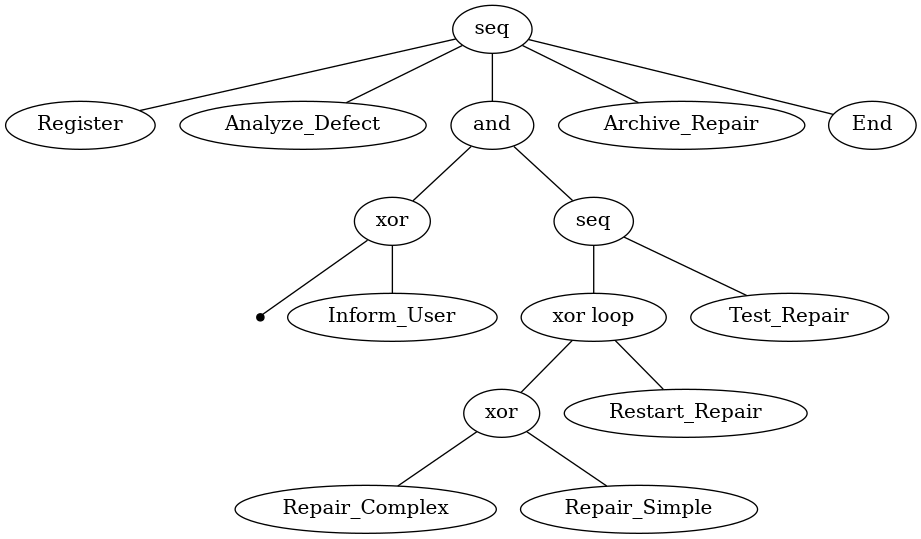





our_problems/problem_3.p
Vampire: % SZS status Satisfiable for problem_3 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status Satisfiable


In [26]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.5, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_3.p", rule_prefix="C")
pm4py.view_process_tree(process_tree)
print("\n\n\n")
print_provers(use_provers("our_problems/problem_3.p"))

## Problem4

/tmp/ipykernel_389947/1376494660.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/si

Seq5(1]Register, Analyze_Defect, And2(2]a2_s, Inform_User, Xor3(3]x3_s, tau, Repair_Complex, Loop(4]l_s, Test_Repair, tau[4), x3_e[3), a2_e[2), Archive_Repair, End[1)
ini: Register
fin: End

Wynik: 
ForAll(~((a2_s | a2_e) ^ (Archive_Repair)))
ForAll(~((a2_s | a2_e) ^ (End)))
ForAll(~((Register) ^ (End)))
ForAll(~((tau) ^ (Repair_Complex)))
ForAll((Inform_User) => Exist(a2_e))
ForAll(~((Register) ^ (Analyze_Defect)))
ForAll(~((Register) ^ (a2_s | a2_e)))
ForAll(~((Analyze_Defect) ^ (Archive_Repair)))
ForAll(~((x3_s) ^ (Repair_Complex)))
ForAll(~((Test_Repair) ^ (tau)))
ForAll((tau) => Exist(Test_Repair))
ForAll((Analyze_Defect) => Exist(a2_s | a2_e))
ForAll((Test_Repair) => ((Exist(tau) ^ Exist(Test_Repair)) | (~(Exist(tau)))))
ForAll((a2_s | a2_e) => Exist(Archive_Repair))
ForAll(~((Analyze_Defect) ^ (a2_s | a2_e)))
Exist(Register)
ForAll((Register) => Exist(Analyze_Defect))
ForAll(~((x3_s) ^ (tau)))
ForAll(~((Repair_Complex) ^ (l_s | Test_Repair)))
ForAll(~((x3_s) ^ (l_s | Test_Repair

/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[co

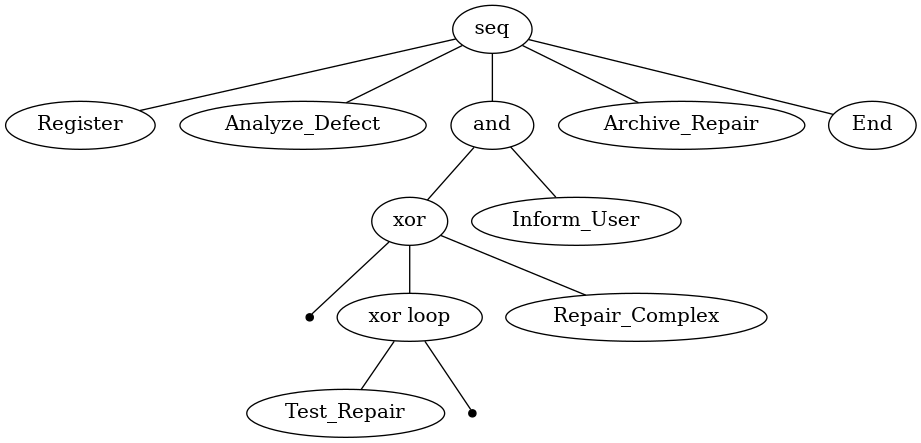





our_problems/problem_4.p
Vampire: % SZS status Satisfiable for problem_4 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status Satisfiable


In [27]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 1.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_4.p", rule_prefix="D", verbose=True)
pm4py.view_process_tree(process_tree)
print("\n\n\n")
print_provers(use_provers("our_problems/problem_4.p"))

## Problem5

In [28]:
create_thesis_with_2_spec('our_problems/problem_2.p', 
                          'our_problems/problem_3.p', 'our_problems/problem_5.p', LogicFunctions.IMPLIES)
print_provers(use_provers("our_problems/problem_5.p", verbose=True))

Output:
% Running in auto input_syntax mode. Trying TPTP
% Refutation found. Thanks to Tanya!
% SZS status Theorem for problem_5
% SZS output start Proof for problem_5
26. ? [X1] : x2_s(X1) [input]
36. ! [X1] : ~(a2_e(X1) & (a2_e(X1) | a2_s(X1) | x2_e(X1) | x2_s(X1))) [input]
114. ! [X0] : ((x2_e(X0) | x2_s(X0)) => ? [X1] : a2_e(X1)) [input]
137. ? [X0] : x2_s(X0) [rectify 26]
143. ! [X0] : ~(a2_e(X0) & (a2_e(X0) | a2_s(X0) | x2_e(X0) | x2_s(X0))) [rectify 36]
315. ! [X0] : (~a2_e(X0) | (~a2_e(X0) & ~a2_s(X0) & ~x2_e(X0) & ~x2_s(X0))) [ennf transformation 143]
391. ! [X0] : (? [X1] : a2_e(X1) | (~x2_e(X0) & ~x2_s(X0))) [ennf transformation 114]
421. ? [X0] : x2_s(X0) => x2_s(sK15) [choice axiom]
422. x2_s(sK15) [skolemisation 137,421]
500. ? [X1] : a2_e(X1) => a2_e(sK58) [choice axiom]
501. ! [X0] : (a2_e(sK58) | (~x2_e(X0) & ~x2_s(X0))) [skolemisation 391,500]
558. x2_s(sK15) [cnf transformation 422]
574. ~a2_e(X0) | ~a2_e(X0) [cnf transformation 315]
712. a2_e(sK58) | ~x2_s(X0) [cnf 

## Problem6

In [29]:
create_thesis_with_2_spec('our_problems/problem_3.p',
                          'our_problems/problem_4.p', 'our_problems/problem_6.p', LogicFunctions.IMPLIES)
print_provers(use_provers("our_problems/problem_6.p"))

our_problems/problem_6.p
Vampire: % SZS status CounterSatisfiable for problem_6 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status CounterSatisfiable


## Problem7

In [30]:
create_thesis_with_2_spec('our_problems/problem_1.p',
                          'our_problems/problem_4.p', 'our_problems/problem_7.p', LogicFunctions.IMPLIES)
print_provers(use_provers("our_problems/problem_7.p"))

our_problems/problem_7.p
Vampire: % SZS status CounterSatisfiable for problem_7 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status CounterSatisfiable


## Problem8

In [31]:
create_thesis_with_2_spec('our_problems/problem_2.p',
                          'our_problems/problem_3.p', 'our_problems/problem_8.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("our_problems/problem_8.p"))

our_problems/problem_8.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_8
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Problem9

In [32]:
create_thesis_with_2_spec('our_problems/problem_3.p',
                          'our_problems/problem_4.p', 'our_problems/problem_9.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("our_problems/problem_9.p"))

our_problems/problem_9.p
Vampire: % SZS status CounterSatisfiable for problem_9 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status CounterSatisfiable


## Problem10

In [33]:
create_thesis_with_2_spec('our_problems/problem_1.p',
                          'our_problems/problem_4.p', 'our_problems/problem_10.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("our_problems/problem_10.p"))

our_problems/problem_10.p
Vampire: % SZS status CounterSatisfiable for problem_10 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status CounterSatisfiable


## Thesis

In [34]:
thesis5 = '''
fof(thesis, conjecture, (
    ! [X]: (register_request(X) => ?[Y]: (reject_request(Y) | pay_compensation(Y)))
)).
'''
thesis6 = '''
fof(thesis, conjecture, (
    ! [X]: (~(reject_request(X) & pay_compensation(X)))
)).
'''
thesis7 = '''
fof(thesis, conjecture, (
    ! [X]: (register(X) => ?[Y]: (repair_simple(Y) | repair_complex(Y)))
)).
'''
thesis8 = '''
fof(thesis, conjecture, (
    ! [X]: (~(inform_user(X) & tau(X)))
)).
'''

## Problem11

In [35]:
with open('our_problems/problem_1.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis5
with open('our_problems/problem_11.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_11.p"))

our_problems/problem_11.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_11
Eprover: # Proof found! # SZS status Theorem


## Problem12

In [36]:
with open('our_problems/problem_1.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis6
with open('our_problems/problem_12.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_12.p"))

our_problems/problem_12.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_12
Eprover: # Proof found! # SZS status Theorem


## Problem13

In [37]:
with open('our_problems/problem_3.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis7
with open('our_problems/problem_13.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_13.p"))

our_problems/problem_13.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_13
Eprover: # Proof found! # SZS status Theorem


## Problem14

In [38]:
with open('our_problems/problem_3.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis8
with open('our_problems/problem_14.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_14.p"))

our_problems/problem_14.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_14
Eprover: # Proof found! # SZS status Theorem


## Problem15

In [39]:
with open('our_problems/problem_4.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis7
with open('our_problems/problem_15.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_15.p"))

our_problems/problem_15.p
Vampire: % SZS status CounterSatisfiable for problem_15 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status CounterSatisfiable


## Problem16

In [40]:
with open('our_problems/problem_4.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis8
with open('our_problems/problem_16.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_16.p"))

our_problems/problem_16.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_16
Eprover: # Proof found! # SZS status Theorem


# Run all

In [45]:
folder = 'our_problems'

res = []

problem_files = sorted([f for f in os.listdir(folder) if f.endswith('.p')])
for problem_file in problem_files:
    res.append(use_provers(os.path.join(folder, problem_file)))

for r in res:
    provers_to_csv(r)

print("\n\n\n")

for r in res:
    print_provers(r)
    print()

our_problems/problem_1.p,% SZS status Satisfiable for problem_1 % # SZS output start Saturation.,# No proof found! # SZS status Satisfiable
our_problems/problem_10.p,% SZS status CounterSatisfiable for problem_10 % # SZS output start Saturation.,# No proof found! # SZS status CounterSatisfiable
our_problems/problem_11.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_11,# Proof found! # SZS status Theorem
our_problems/problem_12.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_12,# Proof found! # SZS status Theorem
our_problems/problem_13.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_13,# Proof found! # SZS status Theorem
our_problems/problem_14.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_14,# Proof found! # SZS status Theorem
our_problems/problem_15.p,% SZS status CounterSatisfiable for problem_15 % # SZS output start Saturation.,# No proof found! # SZS status CounterSatisfiable
our_prob

# Run one

In [42]:
print_provers(use_provers('problem.p', verbose=True))

Output:
% Running in auto input_syntax mode. Trying TPTP
% Refutation found. Thanks to Tanya!
% SZS status Unsatisfiable for problem
% SZS output start Proof for problem
5. ? [X0] : l_s(X0) [input]
12. ! [X0] : ~((repair_simple(X0) | l_s(X0)) & (test_repair(X0) | l_s(X0))) [input]
81. ! [X0] : ((~repair_simple(X0) & ~l_s(X0)) | (~test_repair(X0) & ~l_s(X0))) [ennf transformation 12]
126. ? [X0] : l_s(X0) => l_s(sK3) [choice axiom]
127. l_s(sK3) [skolemisation 5,126]
186. l_s(sK3) [cnf transformation 127]
198. ~l_s(X0) | ~l_s(X0) [cnf transformation 81]
281. ~l_s(X0) [duplicate literal removal 198]
466. $false [resolution 281,186]
% SZS output end Proof for problem
% ------------------------------
% Version: Vampire 4.9 (commit 5ad494e78 on 2024-06-14 14:05:27 +0100)
% Linked with Z3 4.12.3.0 79bbbf76d0c123481c8ca05cd3a98939270074d3 z3-4.8.4-7980-g79bbbf76d
% Termination reason: Refutation

% Memory used [KB]: 516
% Time elapsed: 0.002 s
% ------------------------------
% --------------